In [1]:
import pandas as pd
import patsy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_model import FeatureModel
import contextlib

In [2]:
from ce2_compare import compare, set_name, write_submission_txt, set_idm

In [3]:
set_name("Sujit", "Debnath")
set_idm("ve75wiwa")

# CE2 (Inherently explainable models part 2)
    - Taking a look at new data: The cervical cancer dataset
    - Logistic regression
    - Decision Trees 
    - RuleFit


## The cervical cancer dataset

In [4]:
cv_cancer_path = "datasets/cervical_cancer/risk_factors_cervical_cancer_pre.csv"
cv_data = FeatureModel(cv_cancer_path)

In [5]:
cv_data.df

,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes__years,Hormonal_Contraceptives,Hormonal_Contraceptives__years,IUD,IUD__years,STDs,STDs__Number_of_diagnosis,STDs__Time_since_first_diagnosis,STDs__Time_since_last_diagnosis,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,34.0,1.0,15.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,1.0,3.00,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,1.0,15.00,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34.0,3.0,18.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1.0,0.0
854,32.0,2.0,19.0,1.0,0.0,0.0,1.0,8.00,0.0,0.0,0.0,0.0,1.0,1.0,0.0
855,25.0,2.0,17.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,1.0,1.0,0.0
856,33.0,2.0,24.0,2.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,1.0,1.0,0.0


#### Let's check out the `readme.txt` to find out what all these columns represent

In [6]:
cv_data.add_target("Biopsy")
cv_data.add_all_features_but_target()

FeatureModel(->Not fully specified yet!)
FeatureModel(Biopsy ~ -1 + Age + Number_of_sexual_partners + First_sexual_intercourse + Num_of_pregnancies + Smokes + Smokes__years + Hormonal_Contraceptives + Hormonal_Contraceptives__years + IUD + IUD__years + STDs + STDs__Number_of_diagnosis + STDs__Time_since_first_diagnosis + STDs__Time_since_last_diagnosis )


In [7]:
X, y = cv_data.return_Xy()

In [8]:
X

,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes__years,Hormonal_Contraceptives,Hormonal_Contraceptives__years,IUD,IUD__years,STDs,STDs__Number_of_diagnosis,STDs__Time_since_first_diagnosis,STDs__Time_since_last_diagnosis
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1.0
2,34.0,1.0,15.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1.0
3,52.0,5.0,16.0,4.0,1.0,37.0,1.0,3.00,0.0,0.0,0.0,0.0,1.0,1.0
4,46.0,3.0,21.0,4.0,0.0,0.0,1.0,15.00,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34.0,3.0,18.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1.0
854,32.0,2.0,19.0,1.0,0.0,0.0,1.0,8.00,0.0,0.0,0.0,0.0,1.0,1.0
855,25.0,2.0,17.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,1.0,1.0
856,33.0,2.0,24.0,2.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,1.0,1.0


What is the percentage of people that did have cancer?

In [9]:
y.mean()

Biopsy    0.064103
dtype: float64

### Splitting into test- and training-data

In [10]:
X_train, y_train, X_val, y_val = cv_data.return_Xy(train_test_split=True)

In [11]:
X_train

,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes__years,Hormonal_Contraceptives,Hormonal_Contraceptives__years,IUD,IUD__years,STDs,STDs__Number_of_diagnosis,STDs__Time_since_first_diagnosis,STDs__Time_since_last_diagnosis
408,17.0,2.0,15.0,2.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.0
207,26.0,3.0,18.0,2.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,1.0,1.0
61,35.0,3.0,20.0,5.0,1.0,19.0,1.0,4.000000,0.0,0.0,0.0,0.0,1.0,1.0
455,18.0,1.0,16.0,2.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,1.0
331,27.0,1.0,15.0,4.0,0.0,0.0,1.0,2.282201,1.0,5.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,15.0,2.0,14.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.0
767,15.0,2.0,13.0,1.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,1.0
72,34.0,2.0,21.0,2.0,0.0,0.0,1.0,0.330000,0.0,0.0,0.0,0.0,1.0,1.0
235,25.0,2.0,17.0,1.0,0.0,0.0,1.0,0.500000,0.0,0.0,0.0,0.0,1.0,1.0


## Logistic regression 

In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=1, max_iter=1000)
clf.fit(X_train, y_train)

C:\Users\sujit\miniconda3\envs\xML\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000, random_state=1)

In [13]:
clf.score(X_val, y_val)

0.9302325581395349

Q: What do think of this accuracy / Is there maybe an issue regarding the distribution of target-values?

In [14]:
X_val.iloc[0]

Age                                 25.00
Number_of_sexual_partners            2.00
First_sexual_intercourse            18.00
Num_of_pregnancies                   2.00
Smokes                               0.00
Smokes__years                        0.00
Hormonal_Contraceptives              1.00
Hormonal_Contraceptives__years       0.25
IUD                                  0.00
IUD__years                           0.00
STDs                                 0.00
STDs__Number_of_diagnosis            0.00
STDs__Time_since_first_diagnosis     1.00
STDs__Time_since_last_diagnosis      1.00
Name: 255, dtype: float64

In [15]:
clf.predict(X_val.iloc[0:1])

array([0.])

In [16]:
clf.predict_proba(X_val.iloc[0:1])

array([[0.96604873, 0.03395127]])

### Exercise 2.1
Using the above `Logistic regression` classifier, by what factor does the odds-ratio of having cancer over not having cancer increase for every additional diagnosed STD?

In [17]:
def ex_2_1() -> float:
    return np.exp(clf.coef_[0][11])

In [18]:
compare("ex_2_1", ex_2_1)

C:\Users\sujit\miniconda3\envs\xML\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Great work!


### Exercise 2.2
What is the odds-ratio of having cancer over not having cancer if every feature is at a value of zero?

In [19]:
def ex_2_2() -> float:
    return np.exp(clf.intercept_[0])

In [20]:
compare("ex_2_2", ex_2_2)

C:\Users\sujit\miniconda3\envs\xML\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Great work!


## Decision/Rule Tree (using e.g. CART)

In [21]:
def ex_2_3(random_number_feature=False):
    with contextlib.redirect_stdout(None):
        bike_path = "datasets/bike/rented_bikes_day_pre.csv"
        bike_data = FeatureModel(bike_path)
        bike_data.add_target("cnt")
        bike_data.add_feature("days_since_01_01_2011")
        bike_data.add_feature("season")
        bike_data.add_feature("holiday")
        bike_data.add_feature("weekday")
        bike_data.add_feature("workingday")
        bike_data.add_feature("temp")
        bike_data.add_feature("hum")
        bike_data.add_feature("windspeed")
        
        if random_number_feature:
            np.random.seed(1)
            def random_number(temp):
                #TODO
                return np.ones(temp.shape)
            bike_data.add_function_feature(random_number, "temp",)
    
    return bike_data.return_Xy(train_test_split=True)

### Exercise 2.3
Add the following functionality to the existing `ex_2_3`. If `random_number_feature`=True, then each sample should have an addtional feature that is completely random and normally-distributed

In [22]:
compare("ex_2_3", ex_2_3)

C:\Users\sujit\miniconda3\envs\xML\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Your function does interface but there is some mistake here in your function(/logic) .. 


In [23]:
X_train, y_train, X_val, y_val = ex_2_3()

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
regr = DecisionTreeRegressor(max_depth=4, random_state=1) 
regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=1)

In [26]:
regr.score(X_train, y_train)

0.8403245504298114

In [27]:
regr.score(X_val, y_val)

0.781209554274606

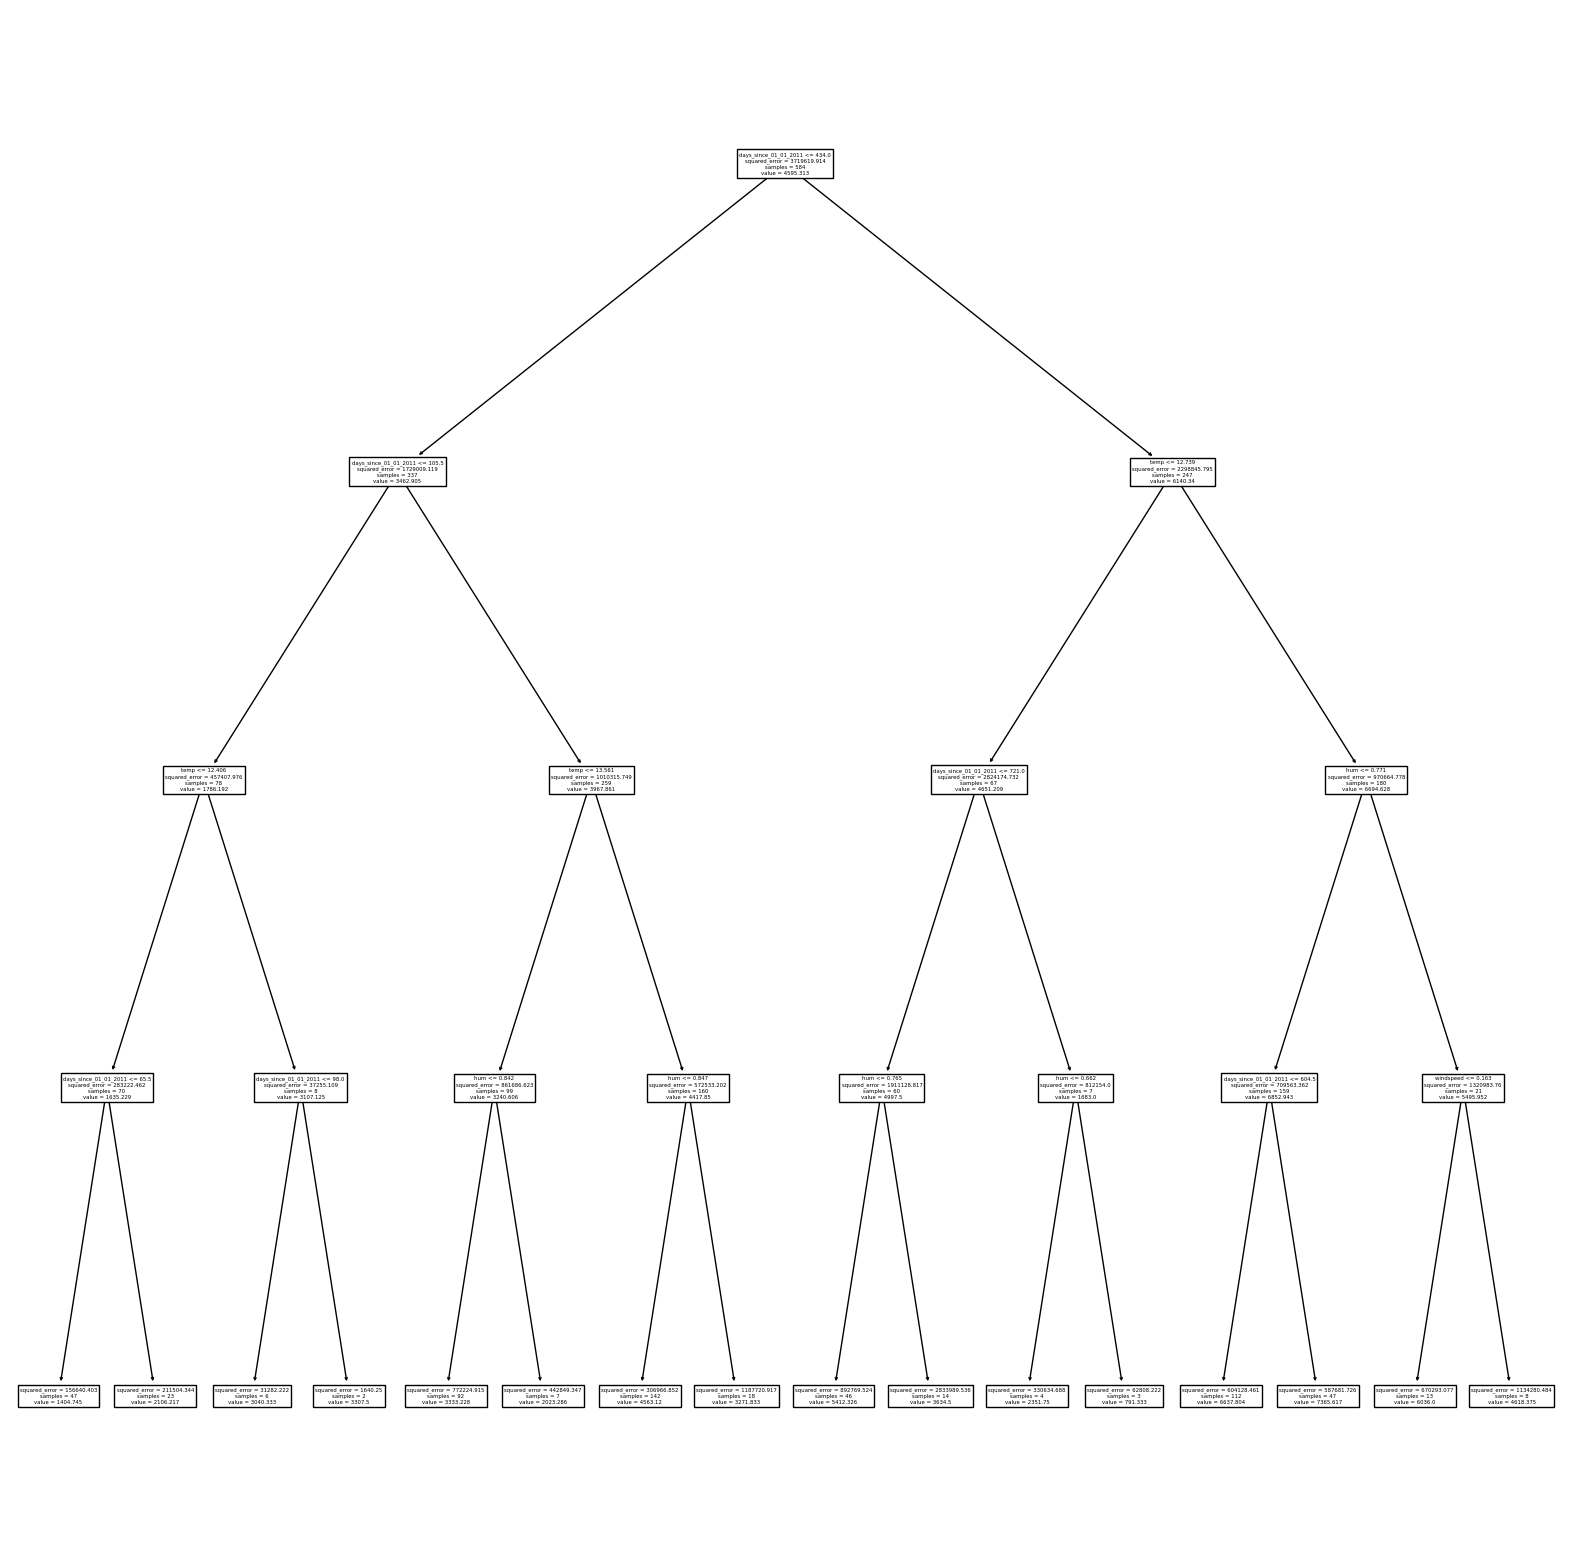

In [28]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(20,20))
ax = plt.gca()
plot_tree(regr, ax=ax, feature_names=X_train.columns)
fig.savefig("tree.png", dpi=400)

### Tree’s Feature Importance from Mean Decrease in Impurity (MDI)

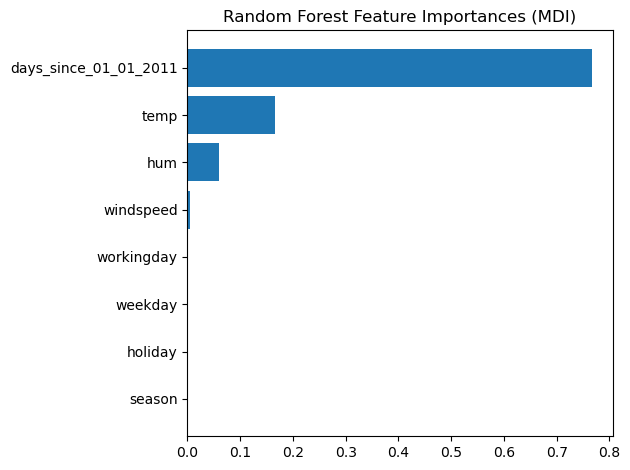

In [29]:
feature_names = X_train.columns

tree_feature_importances = regr.feature_importances_
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

### Exercise 2.4
In the above tree: Find the rule with the largest support (that is the leaf with most samples in it), and follow its path. How many samples are in it? Return that value

In [30]:
def ex_2_4() -> int:
    return 1

In [31]:
compare("ex_2_4", ex_2_4)

C:\Users\sujit\miniconda3\envs\xML\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Your function does interface but there is some mistake here in your function(/logic) .. 


### Exercise 2.5
Write a function that as input takes `min_samples_leaf` and trains the `DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, random_state=1)` on the bike training data using `ex_2_3`. Return the r2-score on training- and validation-data as a tuple

In [32]:
def ex_2_5(min_samples_leaf) -> (float, float):
    X_train, y_train, X_val, y_val = ex_2_3()
    #TODO
    return 1.0, 0.9

In [33]:
compare("ex_2_5", ex_2_5)

C:\Users\sujit\miniconda3\envs\xML\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Your function does interface but there is some mistake here in your function(/logic) .. 


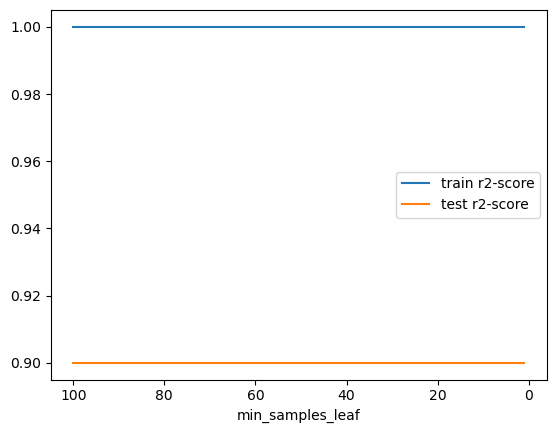

In [34]:
min_samples_leafs = range(1, 101)
train_r2, test_r2 = np.array(list(map(ex_2_5, min_samples_leafs))).transpose()
plt.plot(min_samples_leafs, train_r2, label="train r2-score")
plt.plot(min_samples_leafs, test_r2, label="test r2-score")
plt.xlabel("min_samples_leaf")
plt.gca().invert_xaxis()
plt.legend()

Q: Where is the optimal `min_samples_leaf` value?

### Exercise 2.6
Write a function that as input takes `min_samples_leaf` and trains the `DecisionTreeRegressor(min_samples_leaf=min_samples_leaf, random_state=1)` on the bike training data with a random feature using `ex_2_3(True)`. Return the feature importance of the features: temp, hum, and the random feature

In [35]:
def ex_2_6(min_samples_leaf) -> (float, float, float):
    X_train, y_train, X_val, y_val = ex_2_3(True)
    #TODO
    return 0.3, 0.2, 0.1

In [36]:
compare("ex_2_6", ex_2_6)

C:\Users\sujit\miniconda3\envs\xML\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Your function does interface but there is some mistake here in your function(/logic) .. 


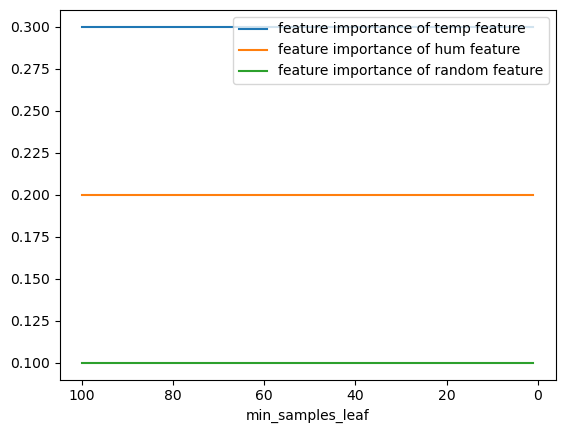

In [37]:
min_samples_leafs = range(1, 101)
ipts_temp, ipts_hum, ipts_randn = np.array(list(map(ex_2_6, min_samples_leafs))).transpose()
plt.plot(min_samples_leafs, ipts_temp, label="feature importance of temp feature")
plt.plot(min_samples_leafs, ipts_hum, label="feature importance of hum feature")
plt.plot(min_samples_leafs, ipts_randn, label="feature importance of random feature")
plt.xlabel("min_samples_leaf")
plt.gca().invert_xaxis()
plt.legend()
plt.show()

Q: Does the random feature gain importance?

## RuleFit
Extract rules using CART and add these rules as features, then use LASSO 

In [38]:
from imodels import RuleFitRegressor

In [39]:
X_train, y_train, X_val, y_val = ex_2_3()
regr = RuleFitRegressor(max_rules=20, tree_size=4, random_state=1) # max_rules=20, tree_size=4, random_state=1
regr.fit(X_train, y_train)

C:\Users\sujit\miniconda3\envs\xML\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RuleFitRegressor(max_rules=20, random_state=1)

In [40]:
regr.score(X_train, y_train)

0.7425312702484043

In [41]:
regr.score(X_val, y_val)

0.7237159472197947

In [42]:
regr.intercept

4324.667133250575

In [43]:
regr.visualize()

,rule,coef
17,temp <= 14.14875,-143.48
15,temp <= 13.79625,-197.35
18,days_since_01_01_2011 <= 718.0 and days_since_01_01_2011 > 424.5,154.01
16,temp <= 13.18917,-7.97
12,temp <= 12.77792,-130.40
24,days_since_01_01_2011 > 417.5 and temp > 8.69353,122.07
19,days_since_01_01_2011 > 438.0 and temp > 5.81816 and hum <= 0.82439,784.99
14,temp <= 11.75958,-115.73
10,temp <= 11.68125,-31.19
20,days_since_01_01_2011 > 370.5 and temp > 7.66667 and hum <= 0.845 and windspeed <= 0.28824,439.18


### Exercise 2.7
Find the rule with the highest support, what is the rule?. Write a function that return this Rule object

In [44]:
from imodels.util.rule import Rule

def ex_2_7() -> Rule:
    #TODO
    return regr.rules_[0]

In [45]:
compare("ex_2_7", ex_2_7)

C:\Users\sujit\miniconda3\envs\xML\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Your function does interface but there is some mistake here in your function(/logic) .. 


### Exercise 2.8
Write a function that takes the name of the feature variable `feature_key` and one specific value for that feature `feature_value`. It should return the number of rented bikes of the average training sample but with the one feature `feature_key` set to the specified `feature_value`. Use the RuleFitRegressor as it is defined above

In [46]:
def ex_2_8(feature_key, feature_value) -> np.array:
    X_average = X_train.mean()
    #TODO
    return np.array([2500])

In [47]:
compare("ex_2_8", ex_2_8)

C:\Users\sujit\miniconda3\envs\xML\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Your function does interface but there is some mistake here in your function(/logic) .. 


In [48]:
def plot_ex_2_8(feature_key, feature_values):
    xs = feature_values
    ys = list(map(lambda x: ex_2_8(feature_key, x), xs))
    plt.plot(xs, ys)
    plt.xlabel(feature_key)
    plt.ylabel("cnt")

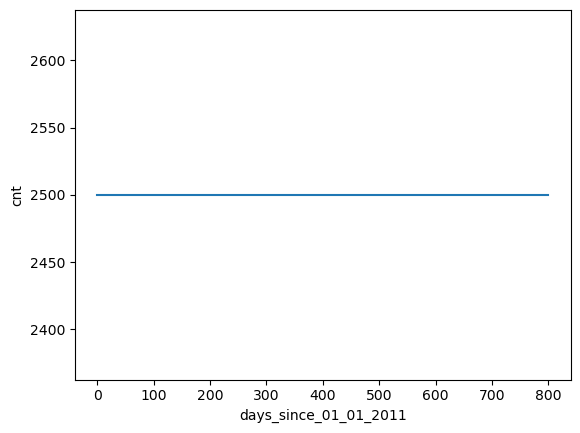

In [49]:
plot_ex_2_8("days_since_01_01_2011", np.linspace(0, 800, 100))
plt.show()

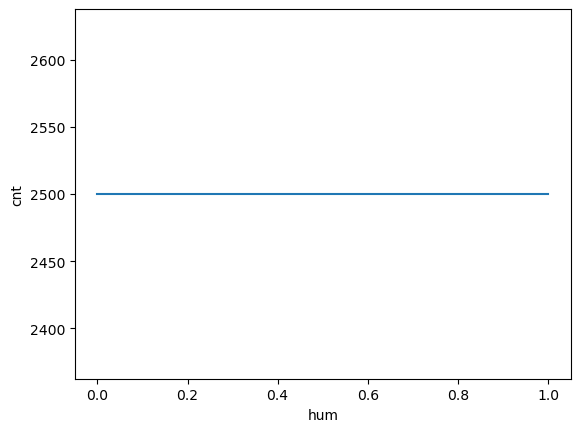

In [50]:
plot_ex_2_8("hum", np.linspace(0, 1, 100))
plt.show()

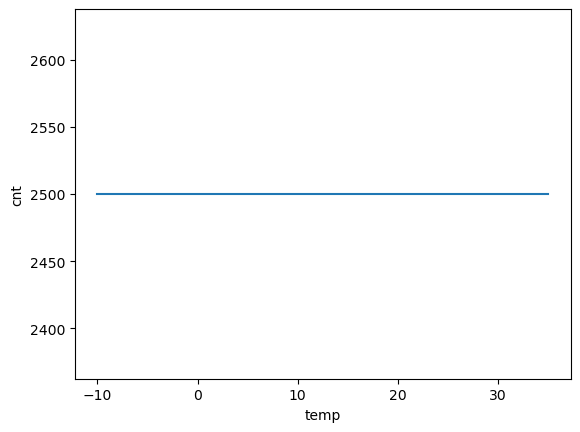

In [51]:
plot_ex_2_8("temp", np.linspace(-10, 35, 100))
plt.show()

Q: Is the Regressor stable around the mean training feature when varying e.g. the temperature?

Q: Would you have to check stability for linear/logistic regression?

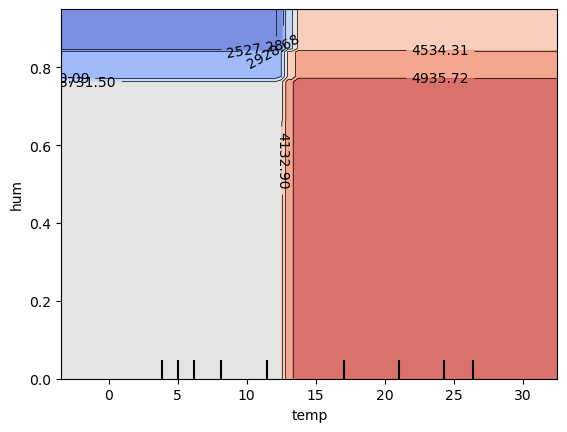

In [52]:
from sklearn.inspection import PartialDependenceDisplay

regr = DecisionTreeRegressor(max_depth=4, random_state=1) 
regr.fit(X_train, y_train)

PartialDependenceDisplay.from_estimator(regr, X_val, [("temp", "hum")], contour_kw=dict(cmap="coolwarm"), grid_resolution=1000)
plt.show()

In [53]:
#TODO: run this
write_submission_txt()

In [54]:
from ce2_compare import scores, grade
scores

{'ex_2_1': True,
 'ex_2_2': True,
 'ex_2_3': False,
 'ex_2_4': False,
 'ex_2_5': False,
 'ex_2_6': False,
 'ex_2_7': False,
 'ex_2_8': False}

In [55]:
# [0.0, 1.0]
grade("ce2_Sujit_Debnath.txt")

'25.0% are correct'